In [1]:
import numpy as np
import operator

import matplotlib
import matplotlib.pylab as plt

In [2]:
# convert file data into numpy matrix and label vector
def file2matrix(filename):
    """
    input: filename, the file directory, assume the first three features are:
            1. flight milage
            2. ratio of gaming time to ...
            3. ice cream consumption per week
            4. the class lable
    output: matrix and class label vector
    """
    file = open(filename)
    numberOfLines = len(file.readlines()) # how many lines
    
    # due to the dataset itself, we only have 3 features
    mat = np.zeros((numberOfLines, 3))
    classLabel = [] # label vector
    
    file = open(filename)
    for i,line in enumerate(file.readlines()):
        line = line.strip() # clean the tail and head
        features = line.split('\t') # separate the string by the tab space
        mat[i, :] = features[0:3] # first three data are featuers
        classLabel.append(int(features[-1])) # last data is the class label
        
    return mat, classLabel
        

Text(0,0.5,'Ice Cream Consumption Per Week')

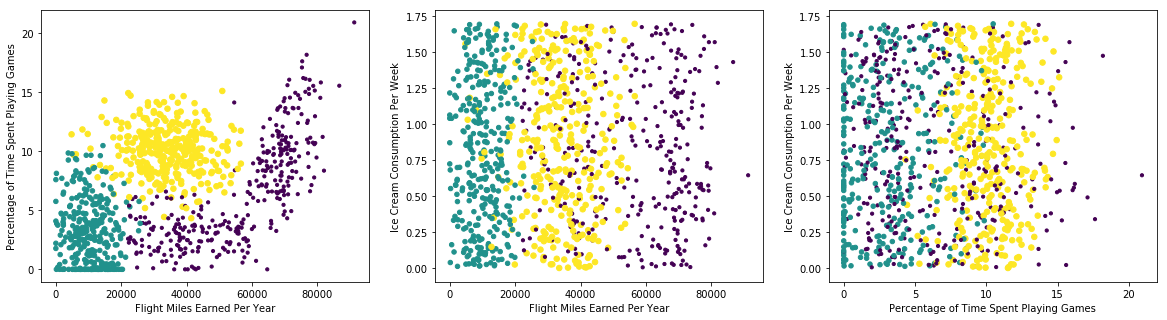

In [3]:
# plot out the first feature and the second feature (flight milage, ratio of gaming time to ...)
datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
fig, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].scatter(datingDataMat[:,0], datingDataMat[:,1],10*np.array(datingLabels), np.array(datingLabels),) #x,y,s,c
ax[0].set_xlabel("Flight Miles Earned Per Year")
ax[0].set_ylabel("Percentage of Time Spent Playing Games")

ax[1].scatter(datingDataMat[:,0], datingDataMat[:,2],10*np.array(datingLabels), np.array(datingLabels)) #x,y,s,c
ax[1].set_xlabel("Flight Miles Earned Per Year")
ax[1].set_ylabel("Ice Cream Consumption Per Week")

ax[2].scatter(datingDataMat[:,1], datingDataMat[:,2],10*np.array(datingLabels), np.array(datingLabels)) #x,y,s,c
ax[2].set_xlabel("Percentage of Time Spent Playing Games")
ax[2].set_ylabel("Ice Cream Consumption Per Week")


##### Consider normalization

In [4]:
def autoNorm(dataSet):
    """
    Nomalization, diminish the affect caused by different scalings
    
    Y = (X-Xmin)/(Xmax-Xmin)
    """
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    
    ranges = maxVals - minVals
    normDataSet = np.zeros(dataSet.shape)
    m = dataSet.shape[0]
    
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    
    return normDataSet, ranges, minVals

##### Classifying using KNN

In [11]:
def classify(inX, dataSet, labels, k):
    # get the distances
    m = dataSet.shape[0]
    diffMat = np.tile(inX, (m, 1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    # sort the distance
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        votedLabel = labels[sortedDistIndicies[i]]
        classCount[votedLabel] = classCount.get(votedLabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    
    return sortedClassCount[0][0] # get the label of the largest voted class

##### Test KNN classifier for the dating web

In [12]:
def datingClassTest():
    # read the data
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    # normalize the data
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # setup the ratio that used as test samples
    ratio = 0.1
    m = normMat.shape[0]
    numTestVecs = int(m * ratio)
    print("numTestVecs=", numTestVecs)
    
    errorCount = 0
    for i in range(numTestVecs):
        classifierResult = classify(normMat[i,:], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is: %f" % (errorCount / float(numTestVecs)))
    print(errorCount)
    
    

In [13]:
datingClassTest()

numTestVecs= 100
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 

##### Help self auto determine

In [19]:
def classifyPerson():
    # define 
    resultList = ["not at all", "in small doses", "in large doses"]
    gameRatio = float(input("percentage of time spent playing video games ?"))
    milage = float(input("frequent filer miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    
    # read the data
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    # normalize the data
    normMat, ranges, minVals = autoNorm(datingDataMat)
    
    # input the raw data
    intX = np.array([milage, gameRatio, iceCream])
    result = classify((intX - minVals)/ranges, normMat, datingLabels, 3)
    print("Your preference is: ", resultList[result-1])

In [20]:
classifyPerson()

percentage of time spent playing video games ?3
frequent filer miles earned per year?5000
liters of ice cream consumed per year?3
Your preference is:  in small doses
